<a href="https://colab.research.google.com/github/dhavalsimaria/MachineLearning/blob/master/NITW/DL%20%26%20AI/End_Course_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras import backend as K
from keras.layers import Dense, Input, Conv2D, Flatten, Reshape, Activation, MaxPooling2D
from keras.datasets import fashion_mnist
from keras.utils import np_utils
from keras.models import Sequential

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

Using TensorFlow backend.


In [2]:
#Question: 1.A
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [0]:
#Question: 1.B
# Change the data type to float32 and normalize
x_train_normalized = x_train.astype('float32')/255
x_test_normalized = x_test.astype('float32')/255

In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [5]:
x_train_normalized[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [0]:
# Question: 2
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

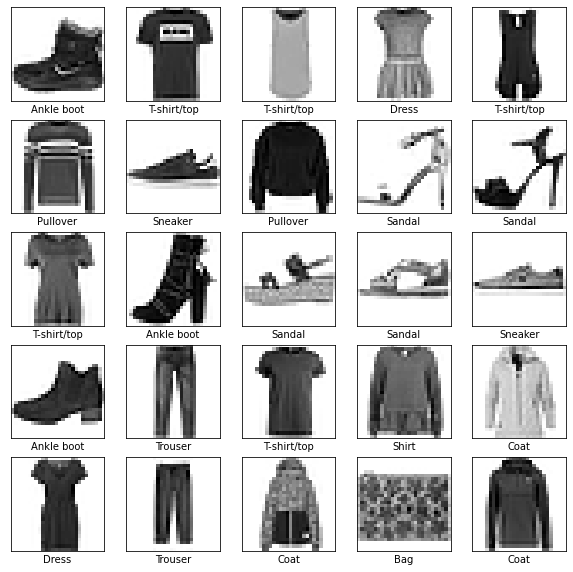

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_normalized[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [0]:
#Question: 3
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [9]:
print('Train image before reshaping: ', x_train.shape)

Train image before reshaping:  (60000, 28, 28)


In [0]:
# Reshape the input images
x_train_reshaped = x_train.reshape(60000, 28, 28, 1)
x_test_reshaped = x_test.reshape(10000, 28, 28, 1)

In [11]:
print('Train image after reshaping: ', x_train_reshaped.shape)

Train image after reshaping:  (60000, 28, 28, 1)


In [0]:
# Question 4.A
def build_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation="relu", padding="same", strides=(1,1),
          input_shape= [28,28,1]))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Dense(10, activation="softmax"))
    return model

In [0]:
model_4a = build_model()

In [14]:
model_4a.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 804,554
Trainable params: 804,554
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Question 4.B
model_4a.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
# Question 4.C
model_4a.fit(x_train_reshaped, y_train, validation_data=(x_test_reshaped, y_test), batch_size=1000, epochs=30)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 7s 123us/step - loss: 38.3950 - accuracy: 0.6807 - val_loss: 4.1599 - val_accuracy: 0.8200
Epoch 2/30
60000/60000 [==============================] - 2s 26us/step - loss: 2.2431 - accuracy: 0.8481 - val_loss: 1.7496 - val_accuracy: 0.8429
Epoch 3/30
60000/60000 [==============================] - 2s 26us/step - loss: 1.1965 - accuracy: 0.8667 - val_loss: 1.1739 - val_accuracy: 0.8584
Epoch 4/30
60000/60000 [==============================] - 2s 26us/step - loss: 0.8289 - accuracy: 0.8759 - val_loss: 1.0034 - val_accuracy: 0.8597
Epoch 5/30
60000/60000 [==============================] - 2s 26us/step - loss: 0.6744 - accuracy: 0.8830 - val_loss: 0.9056 - val_accuracy: 0.8599
Epoch 6/30
60000/60000 [==============================] - 2s 27us/step - loss: 0.5175 - accuracy: 0.8938 - val_loss: 0.8440 - val_accuracy: 0.8623
Epoch 7/30
60000/60000 [==============================] - 2s 27us/

In [0]:
# Question 5
model_5 = build_model()
model_5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
model_5.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 804,554
Trainable params: 804,554
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Convert y_train and y_test to categorical data
num_classes = 10
encoded_y_train = np_utils.to_categorical(y_train, num_classes)
encoded_y_test = np_utils.to_categorical(y_test, num_classes)

In [20]:
model_5.fit(x_train_reshaped, encoded_y_train, validation_data=(x_test_reshaped, encoded_y_test), batch_size=1000, epochs=30)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 2s 29us/step - loss: 56.6737 - accuracy: 0.6898 - val_loss: 5.3260 - val_accuracy: 0.8233
Epoch 2/30
60000/60000 [==============================] - 2s 27us/step - loss: 2.7790 - accuracy: 0.8510 - val_loss: 2.0233 - val_accuracy: 0.8374
Epoch 3/30
60000/60000 [==============================] - 2s 27us/step - loss: 1.3289 - accuracy: 0.8643 - val_loss: 1.2899 - val_accuracy: 0.8593
Epoch 4/30
60000/60000 [==============================] - 2s 26us/step - loss: 0.9011 - accuracy: 0.8760 - val_loss: 1.1527 - val_accuracy: 0.8538
Epoch 5/30
60000/60000 [==============================] - 2s 27us/step - loss: 0.7508 - accuracy: 0.8794 - val_loss: 1.1449 - val_accuracy: 0.8522
Epoch 6/30
60000/60000 [==============================] - 2s 27us/step - loss: 0.6752 - accuracy: 0.8845 - val_loss: 0.8747 - val_accuracy: 0.8724
Epoch 7/30
60000/60000 [==============================] - 2s 27us/s

In [0]:
# Question 6.A
model_5.save_weights("my_model.h5")

In [22]:
# Question 6.B
restored_model = build_model()
restored_model.load_weights("my_model.h5")
restored_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
accuracy_for_restored_model = restored_model.evaluate(x_test_reshaped, encoded_y_test, verbose=0)
print("Restored model, accuracy: ", np.round(accuracy_for_restored_model[1]*100, 2), "%")

Restored model, accuracy:  88.4 %


In [24]:
# Question 7
model_y_pred = restored_model.predict(x_test_reshaped)
model_y_pred = np.argmax(model_y_pred, axis=1)
y_true = np.argmax(encoded_y_test,axis=1)
print(metrics.classification_report(y_true, model_y_pred))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1000
           1       0.98      0.97      0.98      1000
           2       0.88      0.69      0.77      1000
           3       0.89      0.89      0.89      1000
           4       0.78      0.86      0.82      1000
           5       0.96      0.97      0.97      1000
           6       0.66      0.78      0.72      1000
           7       0.95      0.95      0.95      1000
           8       0.97      0.96      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



In [25]:
# Question 8
miscalculations = np.size(np.where(y_true!=model_y_pred)[0])
print(miscalculations)

1160


In [0]:
# Question 9
exp_epoch_list = [10, 30, 50]
exp_batch_size_list = [500, 1000, 5000]
exp_optimizer_list = ['adam', 'rmsprop', 'sgd']

In [30]:
exp_dict = {}
for exp_optimizer in exp_optimizer_list:
  for exp_epoch in exp_epoch_list:
    for exp_batch_size in exp_batch_size_list:
      model_5 = build_model()
      model_5.compile(loss='categorical_crossentropy', optimizer=exp_optimizer, metrics=['accuracy'])
      model_5.fit(x_train_reshaped, encoded_y_train, validation_data=(x_test_reshaped, encoded_y_test), batch_size=exp_batch_size, epochs=exp_epoch)
      accuracy_for_restored_model = np.round(restored_model.evaluate(x_test_reshaped, encoded_y_test, verbose=0)[1], 4)
      dict_key = exp_optimizer+str(exp_epoch)+str(exp_batch_size);
      print(dict_key, ": ", accuracy_for_restored_model)
      exp_dict[dict_key] = accuracy_for_restored_model

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 38us/step - loss: 14.5358 - accuracy: 0.7865 - val_loss: 1.6848 - val_accuracy: 0.8569
Epoch 2/10
60000/60000 [==============================] - 2s 33us/step - loss: 1.3192 - accuracy: 0.8599 - val_loss: 1.0896 - val_accuracy: 0.8656
Epoch 3/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.7343 - accuracy: 0.8808 - val_loss: 0.8233 - val_accuracy: 0.8693
Epoch 4/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.5029 - accuracy: 0.8942 - val_loss: 0.8354 - val_accuracy: 0.8575
Epoch 5/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.3894 - accuracy: 0.9048 - val_loss: 0.6259 - val_accuracy: 0.8769
Epoch 6/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.2989 - accuracy: 0.9162 - val_loss: 0.6091 - val_accuracy: 0.8733
Epoch 7/10
60000/60000 [==============================] - 2s 34us/s

In [31]:
print(exp_dict)

{'adam10500': 0.884, 'adam101000': 0.884, 'adam105000': 0.884, 'adam30500': 0.884, 'adam301000': 0.884, 'adam305000': 0.884, 'adam50500': 0.884, 'adam501000': 0.884, 'adam505000': 0.884, 'rmsprop10500': 0.884, 'rmsprop101000': 0.884, 'rmsprop105000': 0.884, 'rmsprop30500': 0.884, 'rmsprop301000': 0.884, 'rmsprop305000': 0.884, 'rmsprop50500': 0.884, 'rmsprop501000': 0.884, 'rmsprop505000': 0.884, 'sgd10500': 0.884, 'sgd101000': 0.884, 'sgd105000': 0.884, 'sgd30500': 0.884, 'sgd301000': 0.884, 'sgd305000': 0.884, 'sgd50500': 0.884, 'sgd501000': 0.884, 'sgd505000': 0.884}
